In [1]:
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

In [2]:
filename = "contests_webpage.csv"
data = pd.read_csv('data_20220301/' + filename, index_col=0)

In [3]:
# href = pd.read_csv("data_20220301/href_20220301_before_change.csv")

In [4]:
data.shape

(671, 20)

In [5]:
data = data.drop_duplicates()
data.shape

(671, 20)

In [6]:
# data = data.merge(href, left_on='url', right_on='href')
# data = data.drop('href', axis=1)
# data.shape

In [7]:
data.head()

,url,seeker,overview,company_name,description_of_organization_and_audience,requirements,number_of_pages,page_descriptions,existing_website,example_websites,start_time,entry_count,deleted_entry_count,deleted,withdrawn,declined,prize,entries,deleted_entries,winners
title,,,,,,,,,,,,,,,,,,,,
Cool project : Webpages for a Website dedicated to services,https://99designs.hk/web-design/contests/cool-...,Romain1,Coogny is focused on 3 activities : Baby sitti...,Coogny,Consumer oriented\r\nWomen between 25 & 35\r\n...,The value and the idea Coogny's Website should...,4,"Attached, you will find the wireframes of the ...",Unspecified,http://www.bubalicious.com.au/\nhttp://www.joy...,"Tue, 05 Oct 2010 13:51:49 +0000",13,13,1,7,5,US$810,"[{'entry_id': 'entry-25', 'participant_id': '3...","[{'entry_id': 'entry-7', 'participant_id': '32...",['entry-17']
Professional Opera Singer website,https://99designs.hk/web-design/contests/profe...,Zfinkelstein,I am a 26-year old professional tenor opera si...,www.zachfinkelstein.com,"-stage directors, opera directors, conductors,...","-simple, elegant and easy to navigate. No fanc...",1,I would like one page designed with all the bu...,NaN,http://www.annanetrebko.com/ -I LOVE this webs...,"Tue, 05 Oct 2010 17:20:37 +0000",4,55,2,20,33,US$400,"[{'entry_id': 'entry-53', 'participant_id': '3...","[{'entry_id': 'entry-51', 'participant_id': '3...",['entry-53']
Be My Designer: For a new kind of fashion experience,https://99designs.hk/web-design/contests/be-de...,Christinadoheny,I am a 30-something year old woman who sees a ...,www.flashandsplash.com,I will be selling to men and women. These cuso...,"I want my site to be elegant, chic and invitin...",1,This will be the homepage. I need titles and b...,I just own the domain name; I have not created...,"http://www.gina.com (easy to navigate, clean, ...","Tue, 05 Oct 2010 19:52:59 +0000",35,34,30,4,0,US$400,"[{'entry_id': 'entry-69', 'participant_id': '4...","[{'entry_id': 'entry-24', 'participant_id': '4...",['entry-67']
Successful Italian Restaurant Needs Complete Website Redesign,https://99designs.hk/web-design/contests/succe...,rotondo,We will GUARANTEE this project when there are ...,www.amiccis.com,Our target audience are patrons and customers ...,"FIRST, THE CODING:\nThere is another $500.00+ ...",1,There will actually be around 15 total pages o...,http://www.amiccis.com\nProblems:\n1. The font...,"We want bold, unique, fresh, and eye-catching ...","Wed, 06 Oct 2010 03:14:01 +0000",178,121,24,97,0,"US$1,050","[{'entry_id': 'entry-298', 'participant_id': '...","[{'entry_id': 'entry-102', 'participant_id': '...",['entry-298']
Norway calling! A colourful coach/inspirator need web-design,https://99designs.hk/web-design/contests/norwa...,Liv Berit Tonnessen,Since 1994 I have been self employed. Up till ...,www.LivBerit.no (My two first names.),I have 3 different customers:\r\n \r\n1 Leader...,"I really want the designers to be creative, an...",2,Page 1 is homepage\nPage 2 is the generic cont...,My old site: http://www.prosesskonsulenten.no\...,"http://www.scurdal.com/\nThis is aesthetic, a ...","Wed, 06 Oct 2010 23:11:19 +0000",30,73,14,28,31,US$500,"[{'entry_id': 'entry-81', 'participant_id': '3...","[{'entry_id': 'entry-83', 'participant_id': '3...",['entry-81']


## get contest tags

In [8]:
# data['guaranteed'] = data['tags'].apply(lambda x: 1 if 'Guaranteed' in x else 0)
# data['blind'] = data['tags'].apply(lambda x: 1 if 'Blind' in x else 0)
# data['not_blind'] = data['tags'].apply(lambda x: 0 if 'Blind' in x else 1)
# data['fast_tracked'] = data['tags'].apply(lambda x: 1 if 'Fast-tracked' in x else 0)


In [9]:
# data['gold'] = data['tags'].apply(lambda x: 1 if 'Gold' in x else 0)
# data['platinum'] = data['tags'].apply(lambda x: 1 if 'Platinum' in x else 0)

In [10]:
# get entry level data
# data = data[(data['gold']==1) | (data['platinum']==1)]
# data.shape

In [11]:
# data[['guaranteed', 'blind', 'not_blind', 'fast_tracked', 'gold', 'platinum']].describe()

## seeker: those who have host more than 1 contest

In [12]:
# data['seeker'].value_counts()[:20]

## contest type

In [13]:
# data['contest_type'] = data['url'].apply(lambda x: x.split('/')[3].replace('-', '_'))

In [14]:
# data['contest_type'].value_counts()

In [15]:
# data = data[data['contest_type']=='logo_design']
# data.shape

In [17]:
# data = data.drop('contest_type', axis=1)

## prize

In [18]:
data['prize'] = data['prize'].apply(lambda x: int(x.replace(',', '').replace('US$', '')))

In [19]:
data['prize'].describe()

count     671.000000
mean      643.773472
std       287.361350
min       396.000000
25%       400.000000
50%       600.000000
75%       750.000000
max      2736.000000
Name: prize, dtype: float64

<AxesSubplot:>

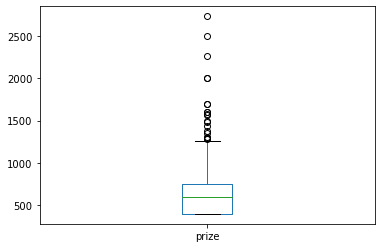

In [20]:
data['prize'].plot(kind='box')

In [21]:
import math
data['prize_log'] = data['prize'].apply(math.log)

In [22]:
data[['prize','prize_log']][:5]

,prize,prize_log
title,,
Cool project : Webpages for a Website dedicated to services,810,6.697034
Professional Opera Singer website,400,5.991465
Be My Designer: For a new kind of fashion experience,400,5.991465
Successful Italian Restaurant Needs Complete Website Redesign,1050,6.956545
Norway calling! A colourful coach/inspirator need web-design,500,6.214608


## start time

In [23]:
data['start_date'] = data['start_time'].apply(lambda x: pd.to_datetime(x).date())

## number of winners

In [24]:
data['number_of_winners'] = data['winners'].apply(lambda x: len(str(x)[1:-1].split(',')))

In [25]:
data['number_of_winners'].value_counts()

1     659
2      10
3       1
10      1
Name: number_of_winners, dtype: int64

In [26]:
data['multi_winner'] = data['number_of_winners'].apply(lambda x: 1 if x > 1 else 0)


In [27]:
data['multi_winner'].value_counts()

0    659
1     12
Name: multi_winner, dtype: int64

## number of submission

In [28]:
data['total_submission'] = data['entry_count'] + data['deleted_entry_count']

## number of participants

In [29]:
def get_number_of_participants(entries, deleted_entries):
    participant_ids = []

    pattern = "'participant_id': '(\d{5,7}')"
    participant_ids += re.findall(pattern, entries) 
    participant_ids += re.findall(pattern, deleted_entries) 

    return len(set(participant_ids))
    

In [30]:
data['number_of_participants'] = data.apply(lambda row: get_number_of_participants(row['entries'], row['deleted_entries']), axis=1)

In [31]:
data[['total_submission', 'number_of_participants']].describe()

,total_submission,number_of_participants
count,671.000000,671.000000
mean,58.697466,13.502235
std,61.321268,11.194598
min,2.000000,1.000000
25%,27.000000,7.000000
50%,45.000000,11.000000
75%,71.000000,17.000000
max,1073.000000,183.000000


## number of submission per participants

In [32]:
data['number_of_submission_per_participants'] = data['total_submission'] / data['number_of_participants']

In [33]:
# data_entry_level.shape

In [34]:
data.to_csv('data_20220301/cleaned_' + filename, index=False)